In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
import random 

In [2]:
def imshow(title = 'image', image = None , size = 5):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

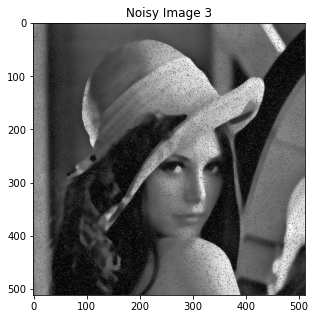

[[[141 141 141]
  [140 140 140]
  [139 139 139]
  ...
  [ 93  93  93]
  [ 73  73  73]
  [ 90  90  90]]

 [[140 140 140]
  [141 141 141]
  [140 140 140]
  ...
  [ 86  86  86]
  [ 91  91  91]
  [ 75  75  75]]

 [[140 140 140]
  [140 140 140]
  [138 138 138]
  ...
  [ 92  92  92]
  [ 89  89  89]
  [ 90  90  90]]

 ...

 [[113 113 113]
  [109 109 109]
  [ 75  75  75]
  ...
  [ 23  23  23]
  [ 26  26  26]
  [ 23  23  23]]

 [[112 112 112]
  [111 111 111]
  [114 114 114]
  ...
  [ 22  22  22]
  [ 27  27  27]
  [ 23  23  23]]

 [[107 107 107]
  [115 115 115]
  [116 116 116]
  ...
  [ 25  25  25]
  [ 24  24  24]
  [ 23  23  23]]]


In [6]:
noisy_image=cv2.imread("C:\\Users\\baksh\\Desktop\\noise3.jpg")
imshow('Noisy Image 3', noisy_image)
print(noisy_image)

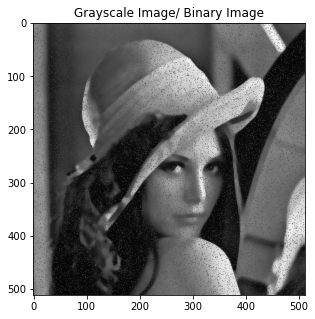

[[141 140 139 ...  93  73  90]
 [140 141 140 ...  86  91  75]
 [140 140 138 ...  92  89  90]
 ...
 [113 109  75 ...  23  26  23]
 [112 111 114 ...  22  27  23]
 [107 115 116 ...  25  24  23]]


In [35]:
# converting the image into gray scale
image_gray = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)
imshow('Grayscale Image/ Binary Image',image_gray)
print(image_gray)

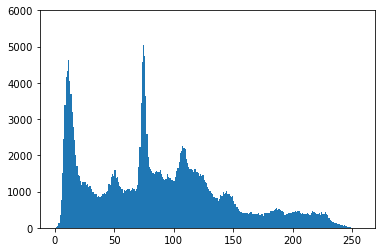

In [5]:
plt.hist(image_gray.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

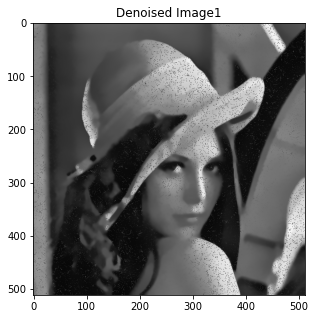

[[138 138 138 ...  87  86  87]
 [138 138 138 ...  86  87  86]
 [138 138 138 ...  87  87  87]
 ...
 [111 113 109 ...  27  28  27]
 [114 114 115 ...  28  28  29]
 [111 114 114 ...  28  29  29]]


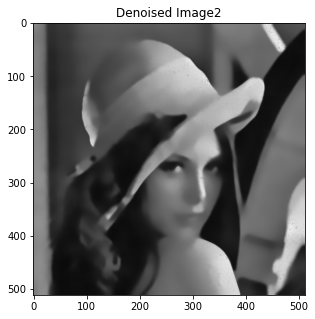

[[134 134 134 ...  86  86  86]
 [134 134 134 ...  86  86  86]
 [134 134 134 ...  86  86  86]
 ...
 [124 125 125 ...  30  30  30]
 [124 125 125 ...  29  29  30]
 [124 124 125 ...  29  29  29]]


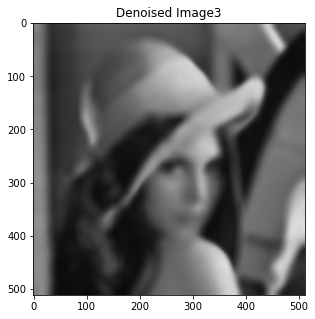

[[133 133 133 ...  85  85  85]
 [133 133 134 ...  85  85  85]
 [133 133 134 ...  84  84  84]
 ...
 [127 128 128 ...  30  30  30]
 [128 128 128 ...  30  29  30]
 [128 128 128 ...  29  29  29]]


In [7]:
image_denoised1=cv2.fastNlMeansDenoising(image_gray, None,h=10,templateWindowSize=4,searchWindowSize=21)
image_denoised2=cv2.fastNlMeansDenoising(image_gray, None,h=30,templateWindowSize=7,searchWindowSize=21)
image_denoised3=cv2.fastNlMeansDenoising(image_gray, None,h=100,templateWindowSize=20,searchWindowSize=21)
imshow('Denoised Image1', image_denoised1)
print(image_denoised1)
imshow('Denoised Image2', image_denoised2)
print(image_denoised2)
imshow('Denoised Image3', image_denoised3)
print(image_denoised3)

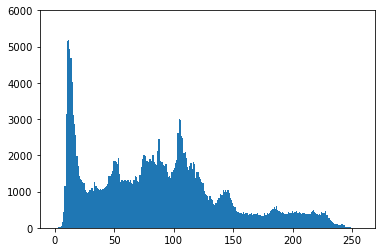

In [8]:
plt.hist(image_denoised1.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

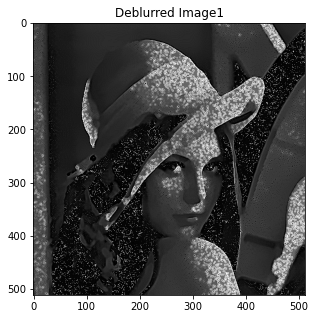

[[69 69 69 ... 50 39 48]
 [69 69 69 ... 39 46 37]
 [69 69 69 ... 48 46 44]
 ...
 [34 54  2 ...  4  0  0]
 [65 68 62 ...  1 13 20]
 [32 58 45 ...  1 20 18]]


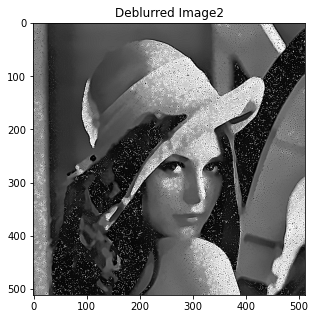

[[137 137 137 ...  92  81  90]
 [137 137 137 ...  81  89  79]
 [137 137 137 ...  90  88  87]
 ...
 [ 88 110  56 ...  17  12   3]
 [121 124 119 ...  15  27  35]
 [ 86 114 101 ...  15  34  33]]


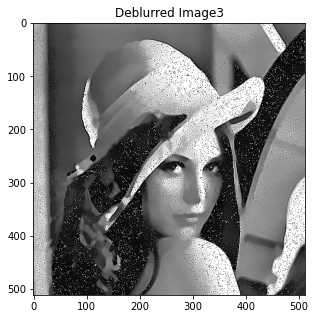

[[179 179 179 ... 119 108 117]
 [179 179 179 ... 108 116 106]
 [179 179 179 ... 117 115 114]
 ...
 [122 145  90 ...  25  20  11]
 [156 159 154 ...  23  35  44]
 [120 149 136 ...  23  43  42]]


In [9]:
kernel1 = np.array([[-1,-1,-1],[-1,8.5,-1],[-1,-1,-1]], np.float32)
kernel2 = np.array([[-1,-1,-1],[-1,8.99,-1],[-1,-1,-1]], np.float32)
kernel3 = np.array([[-1,-1,-1],[-1,9.3,-1],[-1,-1,-1]], np.float32)
image_filtered1 = cv2.filter2D(image_denoised1,-1, kernel1)
image_filtered2 = cv2.filter2D(image_denoised1,-1, kernel2)
image_filtered3 = cv2.filter2D(image_denoised1,-1, kernel3)
imshow('Deblurred Image1', image_filtered1)
print(image_filtered1)
imshow('Deblurred Image2', image_filtered2)
print(image_filtered2)
imshow('Deblurred Image3', image_filtered3)
print(image_filtered3)

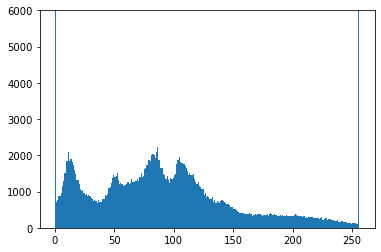

In [10]:
plt.hist(image_filtered2.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

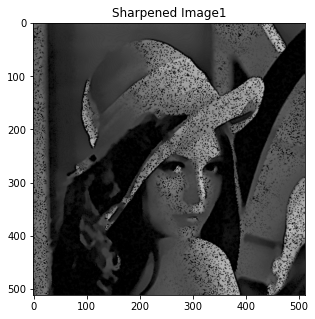

[[110 110 110 ...  60  65  62]
 [110 110 110 ...  65  65  63]
 [110 110 110 ...  64  68  68]
 ...
 [ 70  80  45 ...  14  10   2]
 [ 77  71  71 ...  12  14  10]
 [ 69  89  81 ...  12  15  24]]


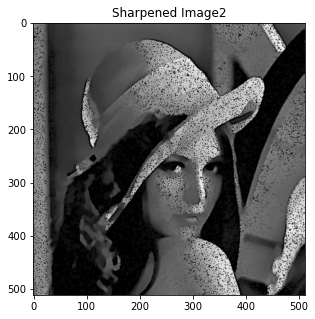

[[137 137 137 ...  78  81  80]
 [137 137 137 ...  81  83  79]
 [137 137 137 ...  82  86  85]
 ...
 [ 88 102  56 ...  17  12   3]
 [101  96  95 ...  15  19  17]
 [ 86 112 101 ...  15  22  31]]


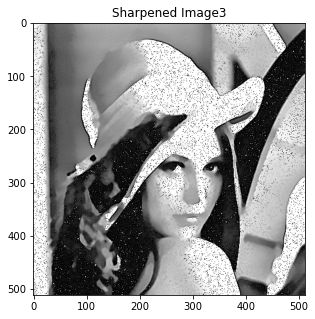

[[255 255 255 ... 161 154 161]
 [255 255 255 ... 154 163 150]
 [255 255 255 ... 163 165 163]
 ...
 [167 201 106 ...  32  23   6]
 [210 208 202 ...  28  43  48]
 [163 215 192 ...  28  53  61]]


In [13]:
blur= cv2.GaussianBlur(image_filtered2,(3,3),0)
image_sharp = cv2.subtract(image_filtered2, blur)
image_sharp1  = cv2.addWeighted(image_filtered2,0.8, image_sharp,-2,0)
image_sharp2  = cv2.addWeighted(image_filtered2,1, image_sharp,-2,0)
image_sharp3  = cv2.addWeighted(image_filtered2,1.9, image_sharp,-2,0)
#image_sharp = cv2.cvtColor(image_sharp, cv2.COLOR_GRAY2BGR)

imshow("Sharpened Image1", image_sharp1)
print(image_sharp1)
imshow("Sharpened Image2", image_sharp2)
print(image_sharp2)
imshow("Sharpened Image3", image_sharp3)
print(image_sharp3)

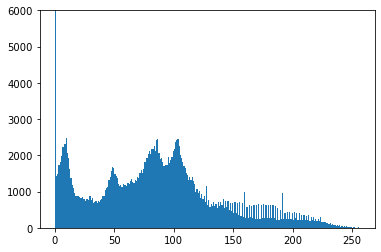

In [14]:
plt.hist(image_sharp2.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

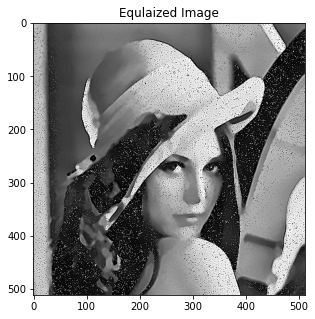

[[193 193 193 ... 131 109 127]
 [193 193 193 ... 109 126 105]
 [193 193 193 ... 127 124 122]
 ...
 [124 162  70 ...  26  17   3]
 [178 182 176 ...  23  38  45]
 [120 168 144 ...  23  44  43]]


In [38]:
equ = cv2.equalizeHist(image_filtered2)
imshow('Equlaized Image',equ)
print(equ)

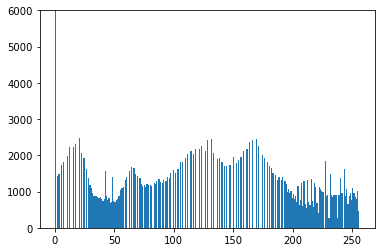

In [16]:
plt.hist(equ.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

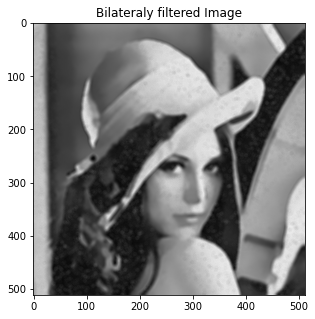

[[194 193 193 ... 120 119 119]
 [194 193 193 ... 119 119 119]
 [194 193 192 ... 118 120 119]
 ...
 [159 162 165 ...  39  36  40]
 [158 161 167 ...  37  33  41]
 [158 159 162 ...  39  41  41]]


In [39]:
image_bfiltered = cv2.bilateralFilter(equ, d=9, sigmaColor = 1000, sigmaSpace = 200)
imshow('Bilateraly filtered Image', image_bfiltered)
print(image_bfiltered)

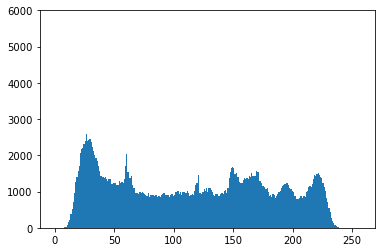

In [40]:
plt.hist(image_bfiltered.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

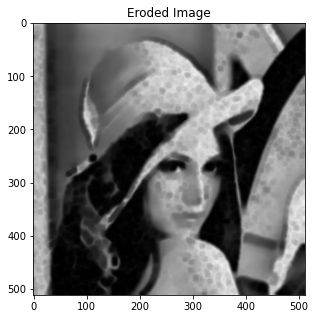

[[209 207 205 ... 122 123 123]
 [209 207 205 ... 122 123 123]
 [209 207 205 ... 122 123 123]
 ...
 [154 154 154 ...  18  18  18]
 [154 154 154 ...  21  21  21]
 [154 154 154 ...  24  24  24]]


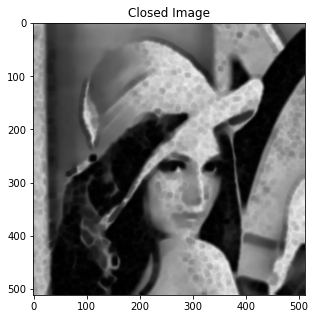

In [19]:
kernel =  np.ones((5,5), np.uint8)

image_erode = cv2.erode(image_bfiltered, kernel, iterations = 1)
imshow('Eroded Image', image_erode)
print(image_erode)

image_closed = cv2.morphologyEx(image_erode, cv2.MORPH_CLOSE, kernel)
imshow('Closed Image',image_closed)

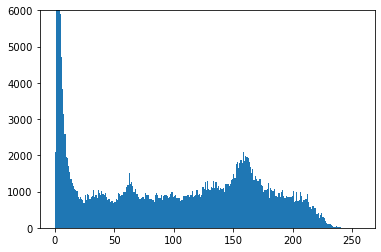

In [20]:
plt.hist(image_closed.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

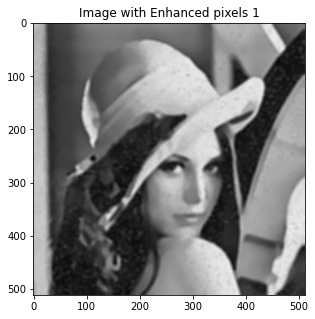

[[195 194 194 ... 121 120 120]
 [195 194 194 ... 120 120 120]
 [195 194 193 ... 119 121 120]
 ...
 [160 163 166 ...  40  37  41]
 [159 162 168 ...  38  34  42]
 [159 160 163 ...  40  42  42]]


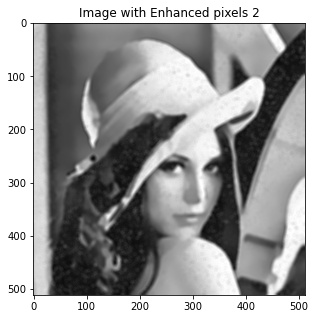

[[214 213 213 ... 133 132 132]
 [214 213 213 ... 132 132 132]
 [214 213 212 ... 131 133 132]
 ...
 [176 179 182 ...  44  41  45]
 [175 178 185 ...  42  37  46]
 [175 176 179 ...  44  46  46]]


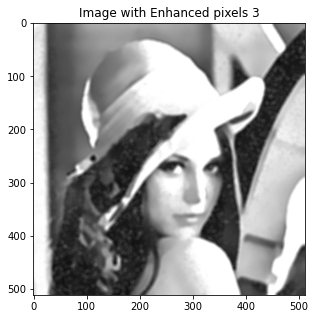

[[254 253 253 ... 158 157 157]
 [254 253 253 ... 157 157 157]
 [254 253 252 ... 155 158 157]
 ...
 [209 213 216 ...  53  49  54]
 [207 211 219 ...  50  45  55]
 [207 209 213 ...  53  55  55]]


In [41]:
alpha1,alpha2,alpha3 = 1.0,1.1,1.3
beta1,beta2,beta3 = 1,1,2
image_enhanced1 = cv2.convertScaleAbs(image_bfiltered, alpha = alpha1 , beta = beta1 )
image_enhanced2 = cv2.convertScaleAbs(image_bfiltered, alpha = alpha2 , beta = beta2 )
image_enhanced3 = cv2.convertScaleAbs(image_bfiltered, alpha = alpha3 , beta = beta3 )
imshow('Image with Enhanced pixels 1', image_enhanced1)
print(image_enhanced1)
imshow('Image with Enhanced pixels 2', image_enhanced2)
print(image_enhanced2)
imshow('Image with Enhanced pixels 3', image_enhanced3)
print(image_enhanced3)

C:\Users\baksh\AppData\Local\Temp\ipykernel_17700\1632262322.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == ():
C:\Users\baksh\AppData\Local\Temp\ipykernel_17700\1632262322.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if eyes == ():


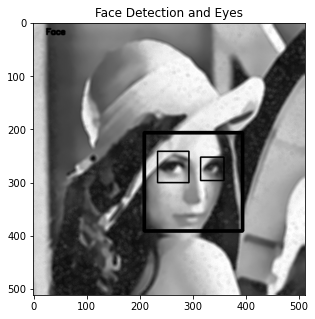

In [42]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
#gray = cv2.cvtColor(image_enhanced,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(image_enhanced2,1.3,minNeighbors=5,minSize =(5,5)) 

if face == ():
    print("No faces found")

for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_enhanced2, 'Face', (x-w, y-h),font,0.5, (0,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_enhanced2, (x,y), (x+w,y+h),(0,0,255),5)
    roi_gray= image_enhanced2[y:y+h,x:x+w]
    roi_color=image_enhanced2[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.1,minNeighbors =1, minSize = (1,1))
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        if eyes == ():
            print("Eyes Not detected")
    
imshow('Face Detection and Eyes',image_enhanced2)

In [34]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
#gray = cv2.cvtColor(noisy_image,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(image_gray,1.3,minNeighbors=5,minSize=(5,5)) 


for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_gray, 'Face', (x-w, y-h),font,0.5, (127,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_gray, (x,y), (x+w,y+h),(127,0,255),5)
    roi_gray= image_gray[y:y+h,x:x+w]
    roi_color=image_gray[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.2,3)
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        
if face == ():
    print("No faces found !!!!!")   
else:
    imshow('Face Detection and Eyes',image_gray)

No faces found !!!!!
